## Green Belt - Lista de Exercícios 1  
### Gráficos de Tendência e de Frequência

2 - Uma clínica que realiza atendimento para pacientes de duas especialidades médicas 
(dermatologia e alergologia) deseja avaliar a satisfação de seus usuários. Para isso, eles decidem 
coletar um indicador que chamaram de índice de satisfação. Esse índice é coletado através de 
um formulário de 10 perguntas que, ao final, é resumido em uma nota de 0 a 10 para a 
satisfação. Para coletar os dados, eles aplicam esses questionários em 10 pacientes por dia, 
durante 20 dias. Também é anotada a especialidade frequentada por cada paciente.  
Os dados estão disponíveis na planilha Green_Belt_FM2S_Lista_Exercícios_01, na aba 
02.Clínica. 

### Importação dos dados

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm

url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Green_Belt/Ex01/base-de-dados/Cl%C3%ADnica.csv'
df = pd.read_csv(url)

df.head()

,Paciente,Dia,Especialidade,Satisfação
0,1,1,D,"7,49"
1,2,1,D,"7,77"
2,3,1,D,"7,82"
3,4,1,A,"8,18"
4,5,1,D,"8,14"


In [135]:
# Corrigir a coluna de Satisfação (trocando vírgula por ponto e convertendo para float)
df["Satisfação"] = df["Satisfação"].str.replace(",", ".").astype(float)

### Responda:

a) Que tipo de variável é o índice de satisfação? É uma variável de contagem, classificação 
ou uma variável contínua? 

Resposta: É uma variável contínua, pois esta recebendo valores decimais.

b) Avalie como está a distribuição das notas durante os 20 dias como um todo. Lembre-se 
de escolher o tipo correto de gráfico de frequência para esta variável. Ainda não vamos 
fazer este gráfico estratificado por especialidade, vamos entender como se comporta a 
satisfação para toda a clínica primeiro. 

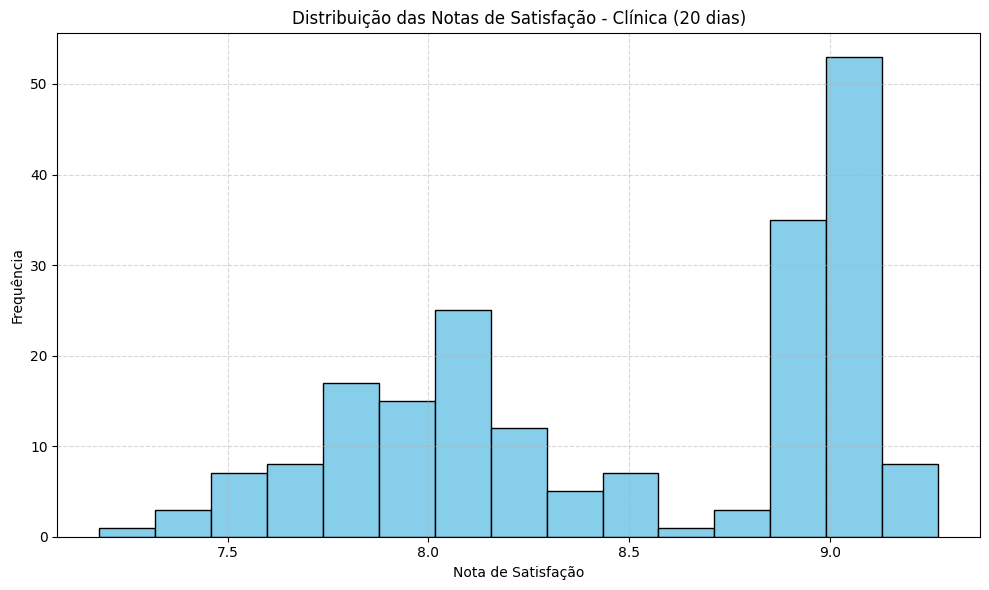

In [136]:
# Criar o histograma
plt.figure(figsize=(10, 6))
plt.hist(df["Satisfação"], bins=15, edgecolor='black', color='skyblue')
plt.title("Distribuição das Notas de Satisfação - Clínica (20 dias)")
plt.xlabel("Nota de Satisfação")
plt.ylabel("Frequência")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

c) Ao longo dos 20 dias, é possível ver alguma diferença na nota para cada especialidade? 
Estratifique sua análise de dados e compare as frequências (use a coluna 
“Especialidades” para agrupar os dados na hora de traçar o gráfico). 

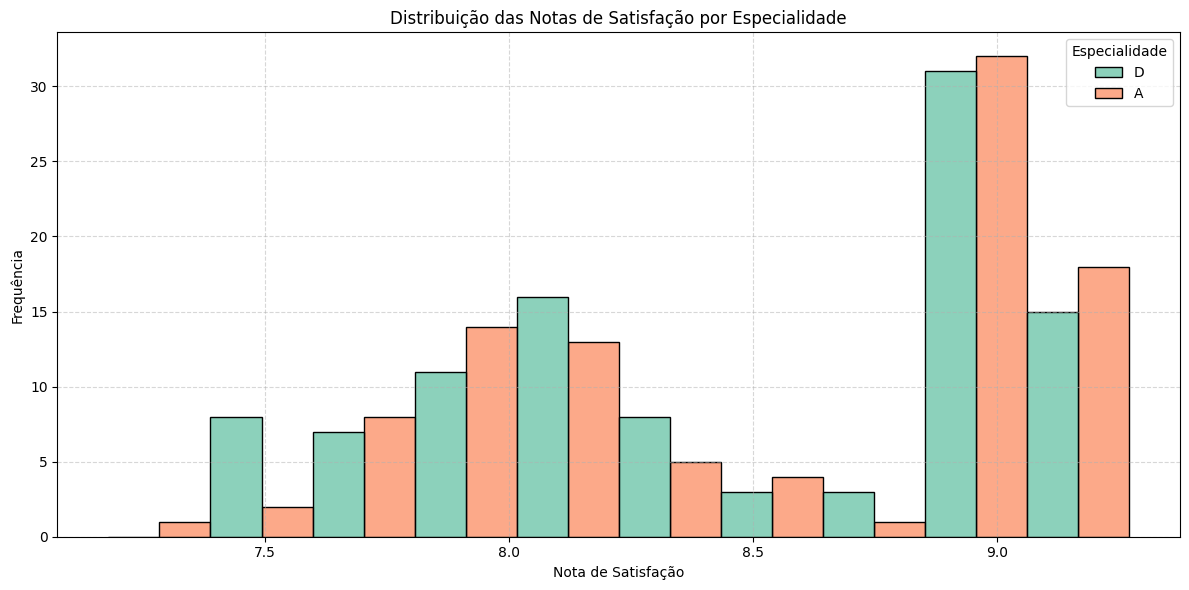

In [137]:
# Criar histograma estratificado por Especialidade
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x="Satisfação",
    hue="Especialidade",
    multiple="dodge",  # lado a lado
    bins=10,
    palette="Set2",
    edgecolor="black"
)

# Configurações do gráfico
plt.title("Distribuição das Notas de Satisfação por Especialidade")
plt.xlabel("Nota de Satisfação")
plt.ylabel("Frequência")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


d) O que isso indica sobre a satisfação? O que no processo poderia gerar esse 
comportamento? 

Resposta: As duas especilidades tem resultados parecidos, ou seja, ela não tem correlação com a nota de satisfação. Neste caso, a especialidade não explica a diferença entre esses dois grupos.

e) Agora, faça uma análise temporal do índice de satisfação. Supondo que os pacientes 
tivessem todos sido coletados em ordem cronológica, desenvolva um gráfico de 
tendência da satisfação por paciente. A análise pode ser feita para todo o conjunto de 
dados ou estratificado (com grupos) por dermatologia e alergologia. Avalie se há alguma 
tendência no gráfico. 

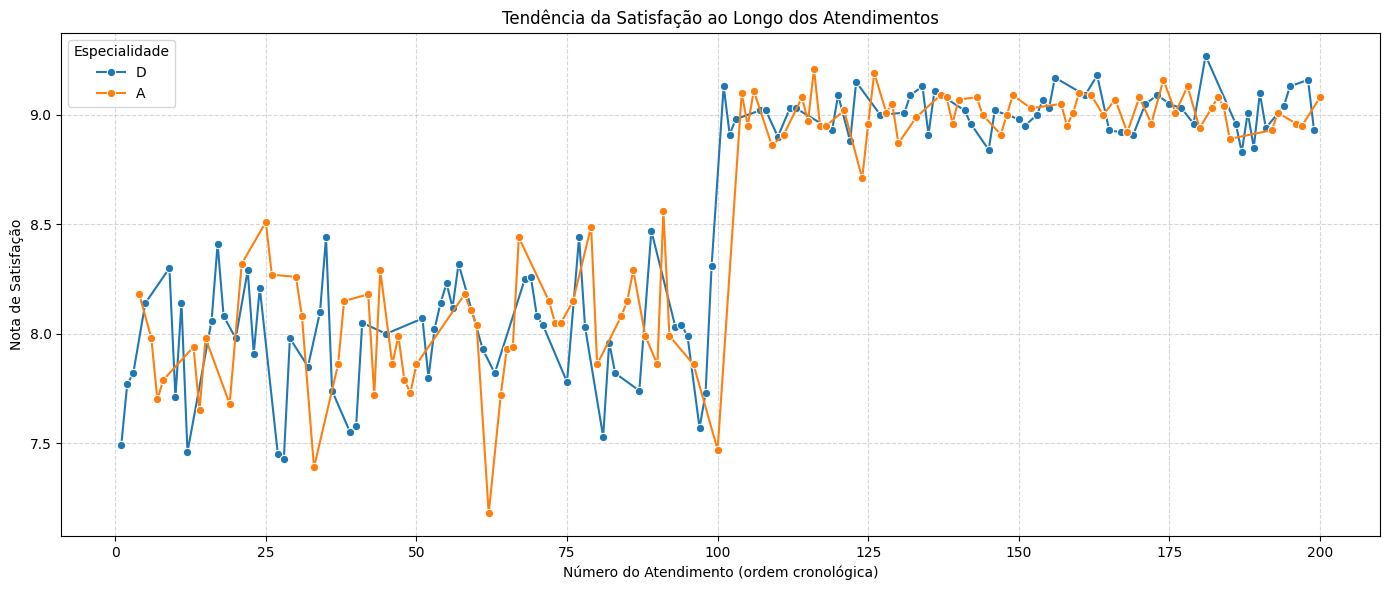

In [138]:
# Adicionar uma coluna de ordem cronológica simulada
#df["Atendimento"] = range(1, len(df) + 1)

# Filtrar apenas Dermatologia e Alergologia
df_subset = df[df["Especialidade"].isin(["D", "A"])]

# Criar gráfico de tendência
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_subset, x="Paciente", y="Satisfação", hue="Especialidade", marker='o')
plt.title("Tendência da Satisfação ao Longo dos Atendimentos")
plt.xlabel("Número do Atendimento (ordem cronológica)")
plt.ylabel("Nota de Satisfação")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Possível ponto de mudança: 91


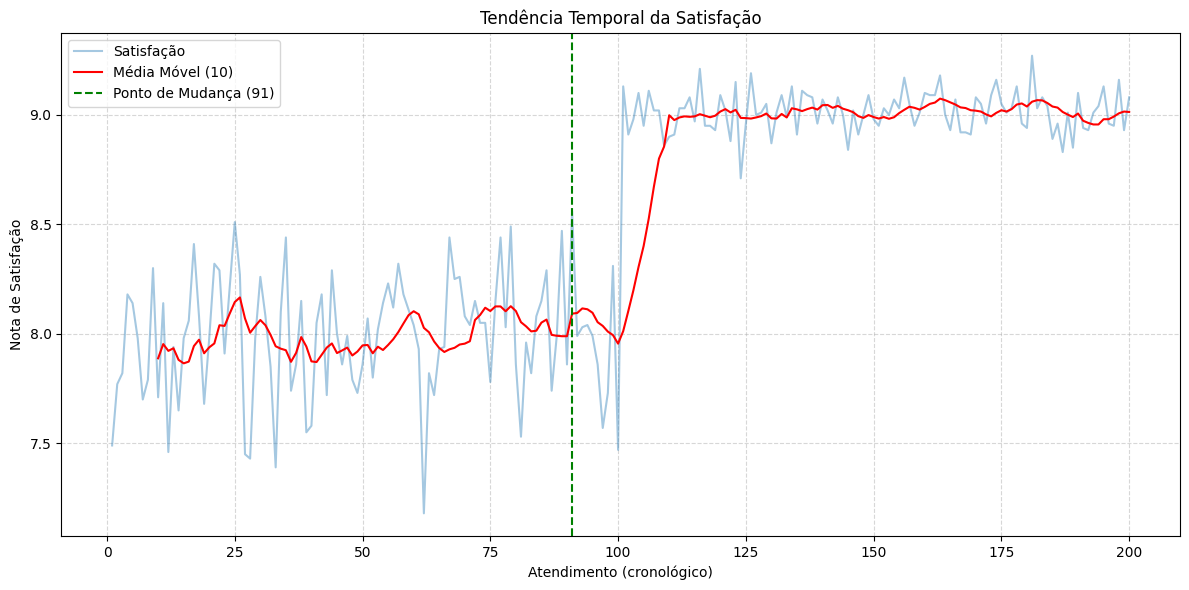

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Supondo que df já está com as colunas "Satisfação", "Especialidade" e "Atendimento" ordenadas

# Cálculo da média móvel
df["Média_Móvel"] = df["Satisfação"].rolling(window=10).mean()

# Calcular a diferença entre médias móveis consecutivas
df["Delta"] = df["Média_Móvel"].diff()

# Identificar o ponto onde a média móvel sobe mais significativamente (ajuste o limiar conforme necessário)
ponto_mudança = df[df["Delta"] > 0.1]["Paciente"].min()
print("Possível ponto de mudança:", ponto_mudança)

# Visualizar
plt.figure(figsize=(12, 6))
plt.plot(df["Paciente"], df["Satisfação"], alpha=0.4, label="Satisfação")
plt.plot(df["Paciente"], df["Média_Móvel"], color='red', label="Média Móvel (10)")
plt.axvline(ponto_mudança, color='green', linestyle='--', label=f'Ponto de Mudança ({ponto_mudança})')
plt.title("Tendência Temporal da Satisfação")
plt.xlabel("Atendimento (cronológico)")
plt.ylabel("Nota de Satisfação")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [140]:
media_antes = df[df["Paciente"] <= 100]["Satisfação"].mean()
media_depois = df[df["Paciente"] > 100]["Satisfação"].mean()
print("Média antes do paciente 100:", round(media_antes, 2))
print("Média depois do paciente 100:", round(media_depois, 2))

Média antes do paciente 100: 7.98
Média depois do paciente 100: 9.01


f) Se uma mudança foi feita a partir do décimo dia, o que podemos dizer dela? 

Resposta: Avaliando o comportamento dos dados, notamos que a mudança realizada apresentou melhora nos resultados a partir do paciente 100 onde o indicador de satisfação subiu a média, em ambas as especialidades.

g) Agora, vamos tentar olhar essa satisfação por dia. Para isso, é necessário “trabalhar a 
base”.

In [153]:
agrupamento = df.groupby("Especialidade")["Satisfação"].agg(
    Média="mean",
    Desvio_Padrão="std",
    Soma="sum",
    Máximo="max",
    Mínimo="min"
).round(2)

agrupamento


,Média,Desvio_Padrão,Soma,Máximo,Mínimo
Especialidade,,,,,
A,8.52,0.55,835.34,9.21,7.18
D,8.47,0.56,864.25,9.27,7.43


In [154]:
agrupamento_por_dia = df.groupby("Dia")["Satisfação"].agg(
    Média="mean",
    Desvio_Padrão="std",
    Soma="sum",
    Máximo="max",
    Mínimo="min"
).round(2)

agrupamento_por_dia

,Média,Desvio_Padrão,Soma,Máximo,Mínimo
Dia,,,,,
1,7.89,0.25,78.88,8.30,7.49
2,7.94,0.27,79.38,8.41,7.46
3,8.06,0.37,80.63,8.51,7.43
4,7.87,0.32,78.74,8.44,7.39
5,7.95,0.19,79.47,8.29,7.72
6,8.10,0.14,81.03,8.32,7.80
7,7.96,0.35,79.55,8.44,7.18
8,8.10,0.22,81.04,8.49,7.78
9,7.99,0.27,79.89,8.47,7.53


h) Aqui, vamos ter que fazer uma média do índice de satisfação a cada dia e, em seguida, 
traçar essa nova base. 

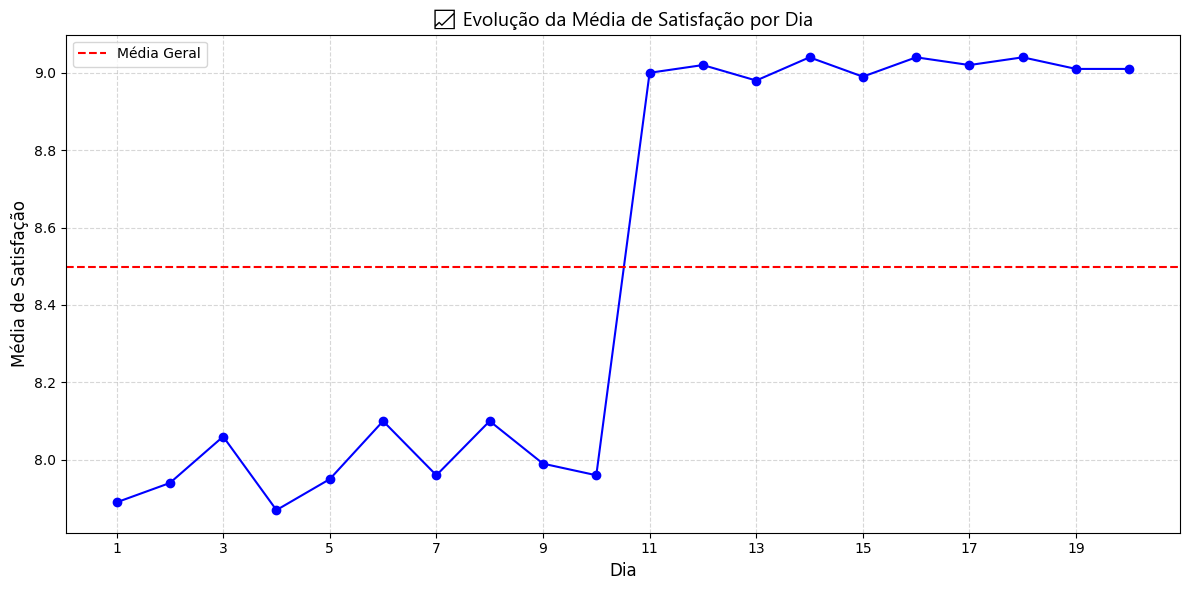

In [159]:
# Caminho da fonte com suporte a emoji (exemplo para Windows)
emoji_font_path = "C:/Windows/Fonts/seguiemj.ttf"
emoji_font = fm.FontProperties(fname=emoji_font_path)

# Supondo que 'agrupamento_por_dia' já está criado com .groupby("Dia")
plt.figure(figsize=(12, 6))
plt.plot(agrupamento_por_dia.index, agrupamento_por_dia["Média"], marker='o', linestyle='-', color='blue')

plt.title("📈 Evolução da Média de Satisfação por Dia", fontproperties=emoji_font, fontsize=14)
plt.xlabel("Dia", fontsize=12)
plt.ylabel("Média de Satisfação", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

# Linha de referência para facilitar a análise visual
plt.axhline(y=agrupamento_por_dia["Média"].mean(), color='red', linestyle='--', label='Média Geral')
plt.xticks(np.arange(pivot.index.min(), pivot.index.max() + 1, 2))  # De 2 em 2 dias


plt.legend()
plt.tight_layout()
plt.show()


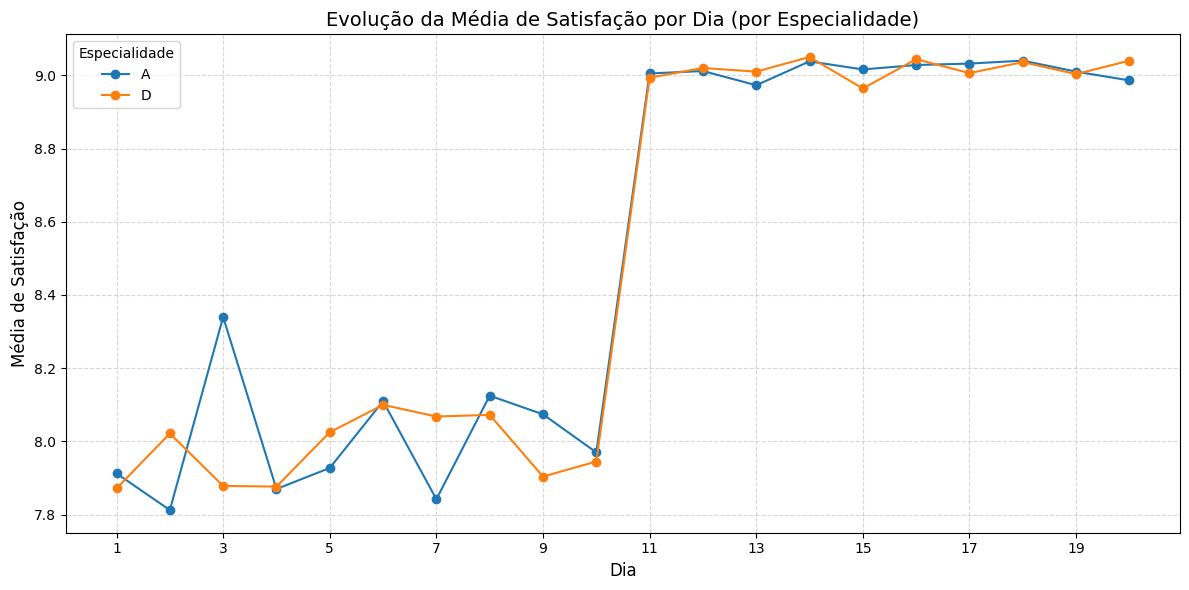

In [160]:
# Agrupar por Dia e Especialidade, calculando a média
media_por_dia_especialidade = df.groupby(["Dia", "Especialidade"])["Satisfação"].mean().reset_index()

# Pivotar os dados para colocar cada especialidade como uma coluna
pivot = media_por_dia_especialidade.pivot(index="Dia", columns="Especialidade", values="Satisfação")

# Plotar
plt.figure(figsize=(12, 6))
for coluna in pivot.columns:
    plt.plot(pivot.index, pivot[coluna], marker='o', label=coluna)
plt.xticks(np.arange(pivot.index.min(), pivot.index.max() + 1, 2))  # De 2 em 2 dias


plt.title("Evolução da Média de Satisfação por Dia (por Especialidade)", fontsize=14)
plt.xlabel("Dia", fontsize=12)
plt.ylabel("Média de Satisfação", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Especialidade")
plt.tight_layout()
plt.show()


i) O que podemos dizer da satisfação por dia? 

In [144]:
# Resposta

agrupamento_por_dia["Variação"] = agrupamento_por_dia["Média"].diff()

dia_mudanca = agrupamento_por_dia[agrupamento_por_dia["Variação"] > 0.3].index.min()
print(f"⚡ Possível dia de virada positiva: {dia_mudanca}")

⚡ Possível dia de virada positiva: 11


j) Para finalizar, diga se a amostra estava equilibrada entre as especialidades. Será que 
houve mais pacientes de dermatologia do que de alergologia na amostra? Faça o gráfico 
de frequência apropriado para dizer.

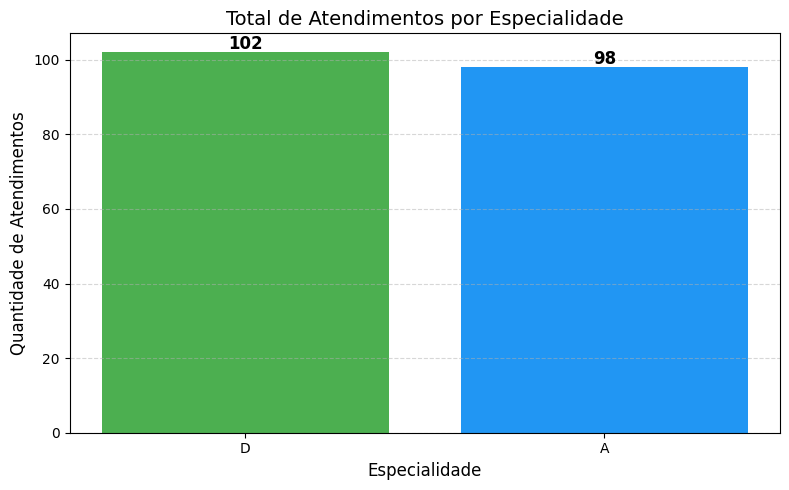

In [161]:
# Contar quantidade de atendimentos por especialidade
contagem = df["Especialidade"].value_counts().sort_values(ascending=False)

# Criar gráfico
plt.figure(figsize=(8, 5))
bars = plt.bar(contagem.index, contagem.values, color=["#4CAF50", "#2196F3"])

# Adicionar valores no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', fontsize=12, fontweight='bold')

plt.title("Total de Atendimentos por Especialidade", fontsize=14)
plt.ylabel("Quantidade de Atendimentos", fontsize=12)
plt.xlabel("Especialidade", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
